
# <div align=center> This notebooks hopes to analyze data available on kaggle </div> 

### This study hopes to achieves the following 

<ul>
  <li>Statistical Analysis</li>
  <li>Machine Learning</li>
  <li>Model compression</li>
</ul>

### Data used

<ul>
  <li> https://www.kaggle.com/datasets/therohithanand/student-academic-performance-dataset</li>
</ul>

#### Luis E. Fernandez

In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy import stats as sp

data_path = pathlib.Path("Datasets/student_info.csv")
data = pd.read_csv(data_path)

data.head(3)

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail


# Data exploration
## Let's see how diverse each column is 

### Analyzing how distributed the qualitative columns are

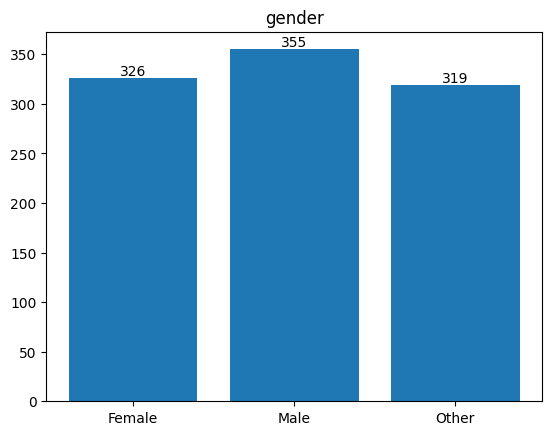

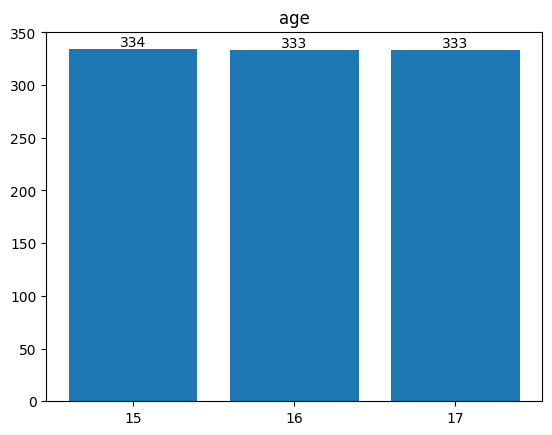

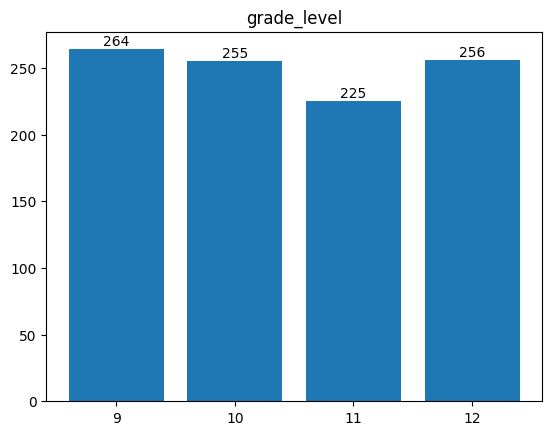

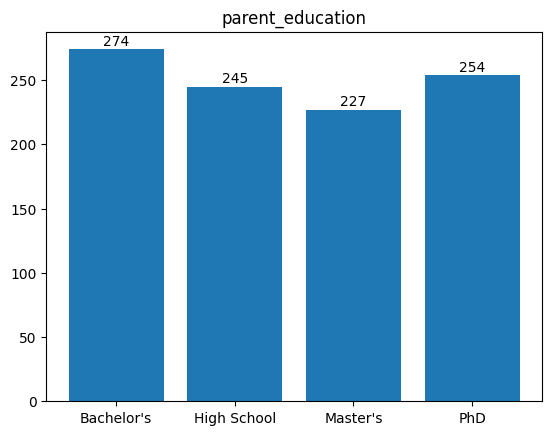

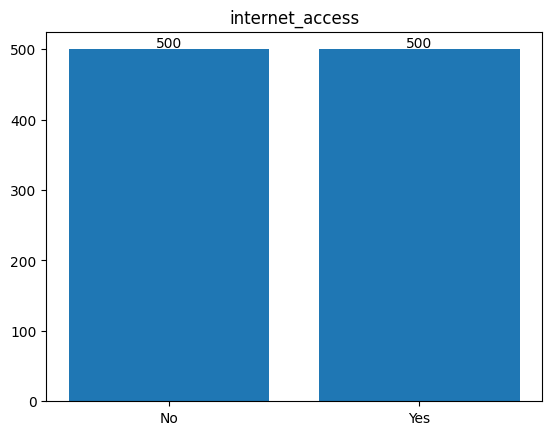

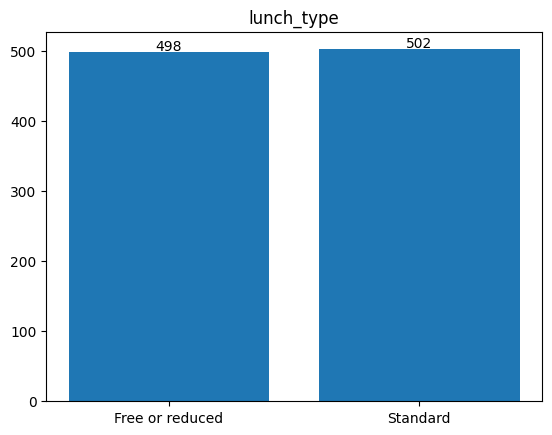

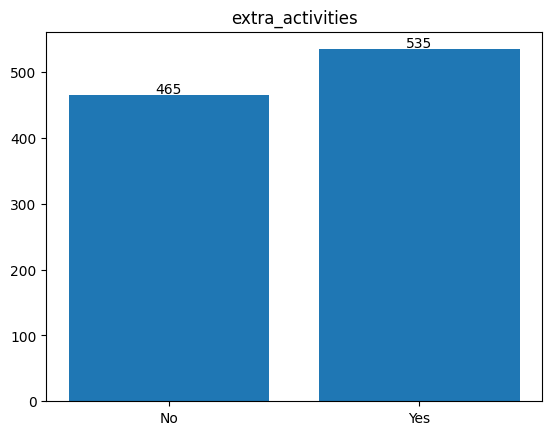

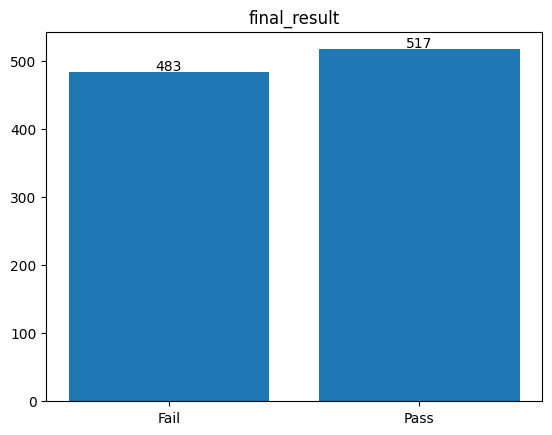

In [6]:
#start from the third column since the first two are identifiers 

#TODO: remove first two columns before analyzing data (unique identifier columns)
qualitative = ['gender','age','grade_level','parent_education','internet_access', 'lunch_type', 'extra_activities','final_result']
quantitative = ['math_score', 'reading_score','writing_score', 'attendance_rate','study_hours']

for column in data[qualitative]:
    data_counter = Counter(data[column])

    unique_values = sorted(data_counter.keys())
    count_values = [data_counter[key] for key in unique_values]

    b = plt.bar(range(len(unique_values)), count_values, tick_label = unique_values, align='center')
    for bar in b:
        # print(bar.__dict__)
        plt.text(bar._x0 + bar._width/2, bar._height+3, bar._height, ha = 'center')
    plt.title(str(column))
    plt.show()


# TODO: THIS

In [3]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, *, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.

    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distribution ei

In [ ]:
# TODO:
'''Create a function the prints the following:
    * Mean
    * Mode
    * Median
    * Standard Deviation
    * Variance '''

def statAnalysis(data:list, name:str|None = None, sample:bool = True)->str:
    mean = np.mean(data)
    mode = sp.mode(data)
    median = np.median(data)
    standard_dev = np.std(data, ddof=1) if sample else np.std(data)
    variance = standard_dev**2

    stats_string = f"""
    mean: {mean}
    mode: {mode.mode} - frequency: {mode.count}
    median: {median}
    standard deviation: {np.round(standard_dev,5)}
    variance: {np.round(variance,5)}"""
    if name:
        print(f"{name}: \n"+stats_string)
    else:
        print(stats_string)
    return stats_string

a = [1,2,3,4,5,6,7]
b = [1,1,2,3,4,5,6,6]
statAnalysis(a, "test")

test: 

    mean: 4.0
    mode: 1 - frequency: 1
    median: 4.0
    standard deviation: 2.16025
    variance: 4.66667


'\n    mean: 4.0\n    mode: 1 - frequency: 1\n    median: 4.0\n    standard deviation: 2.16025\n    variance: 4.66667'

### Analyzing quantitative columns

math_score:
mean: 75.165 
standard deviation: 14.297194654896463


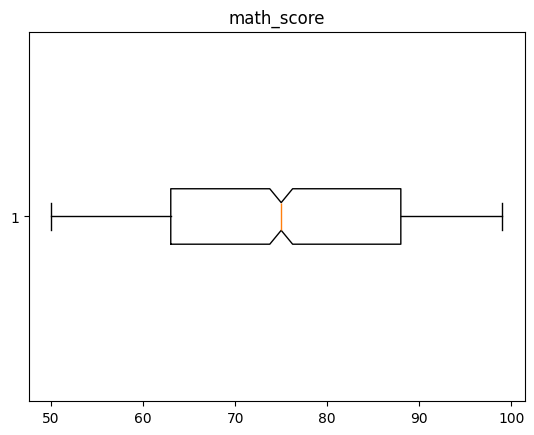

reading_score:
mean: 74.293 
standard deviation: 14.305493734925752


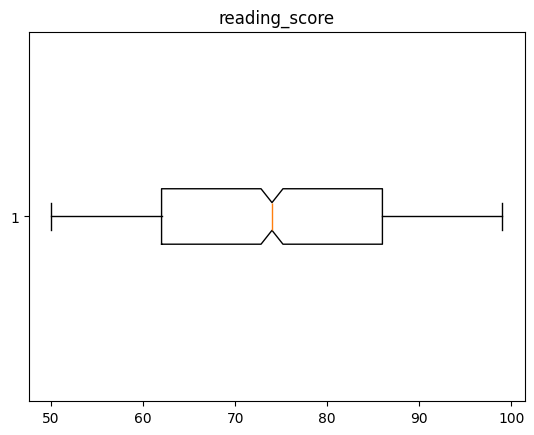

writing_score:
mean: 75.15 
standard deviation: 14.387894217014525


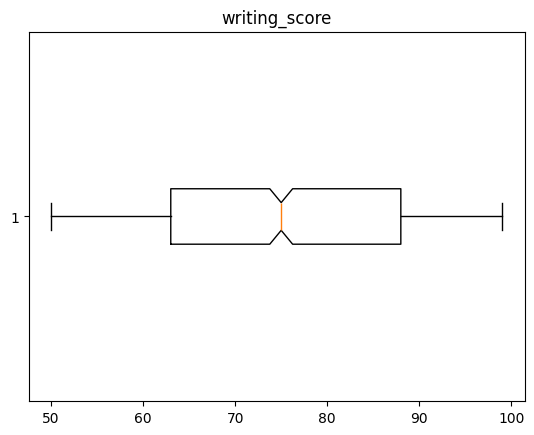

attendance_rate:
mean: 89.87917930734913 
standard deviation: 5.722143488793509


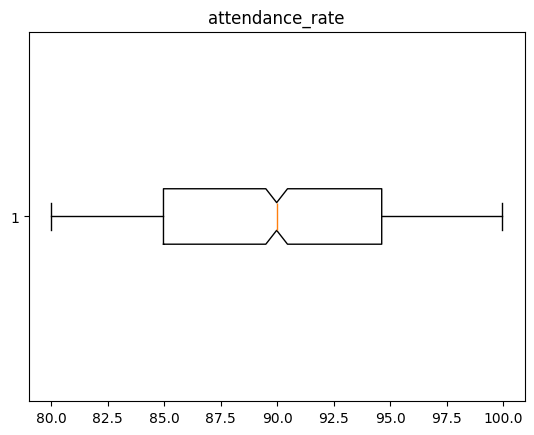

study_hours:
mean: 2.978380122611146 
standard deviation: 1.1671961289331874


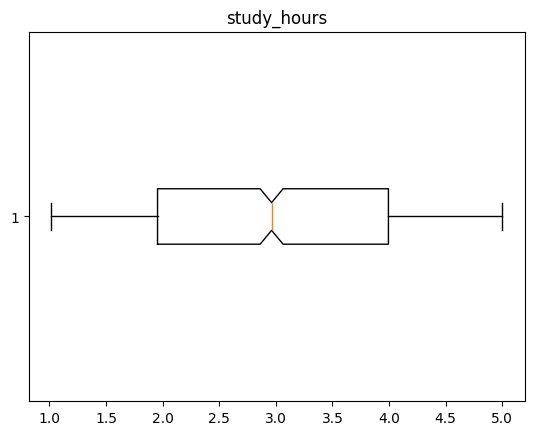

In [7]:
#TODO: D.A. for quants

for column in data[quantitative]:
    plt.boxplot(data[column], orientation='horizontal', notch=True)
    column_mean = np.mean(data[column])
    column_stdev = np.std(data[column])
    print(f"{column}:\nmean: {column_mean} \nstandard deviation: {column_stdev}")
    plt.title(str(column))
    plt.show()


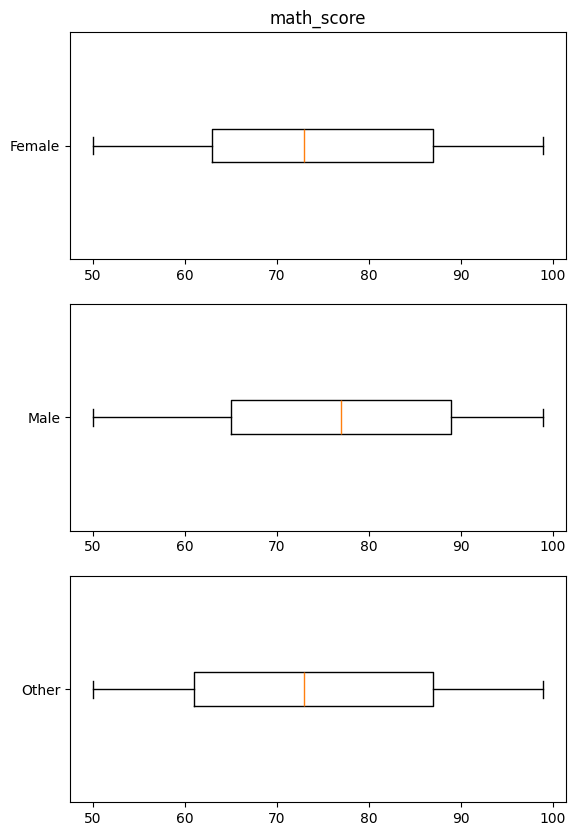

<Figure size 640x480 with 0 Axes>

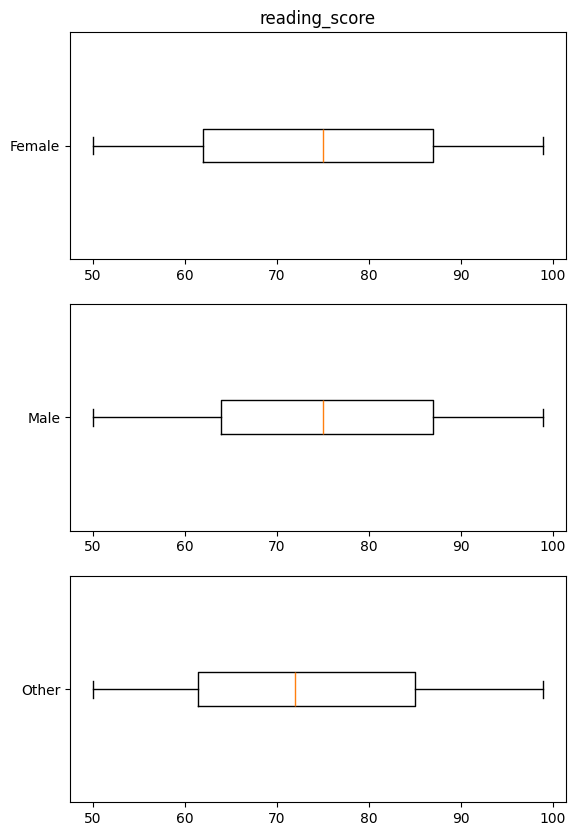

<Figure size 640x480 with 0 Axes>

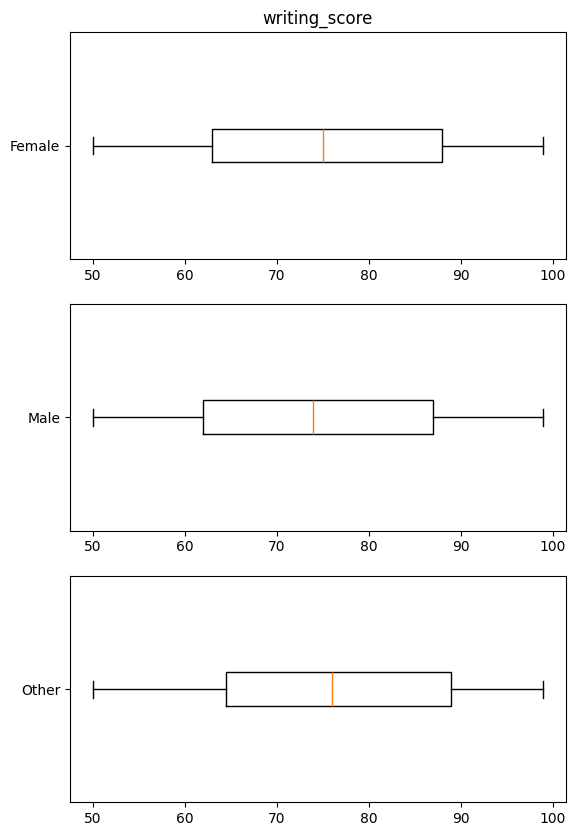

<Figure size 640x480 with 0 Axes>

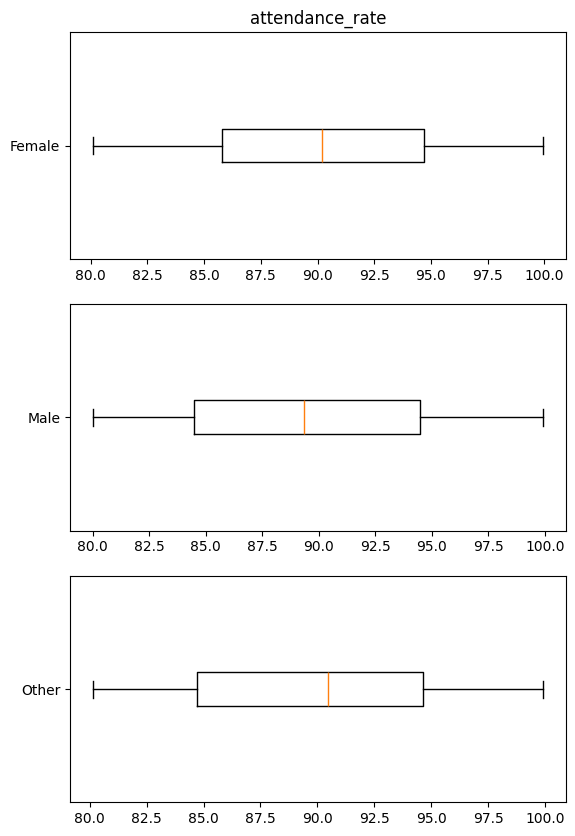

<Figure size 640x480 with 0 Axes>

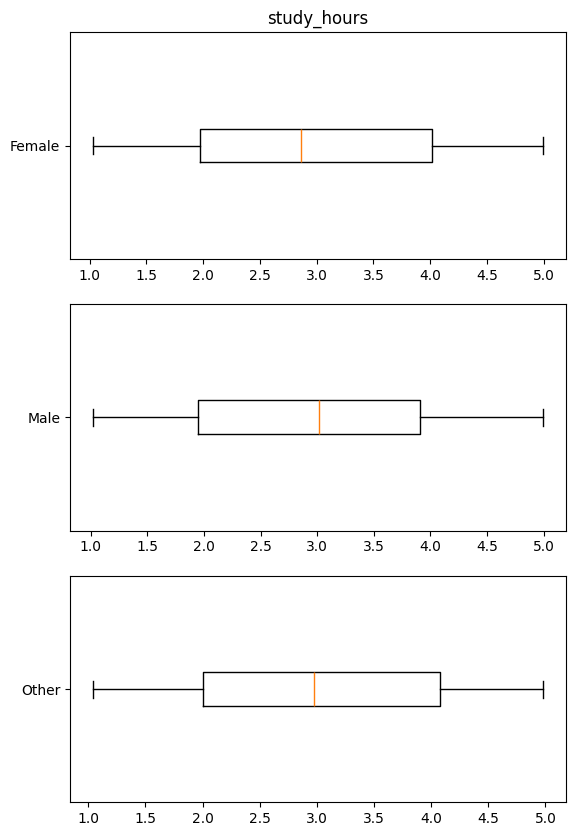

<Figure size 640x480 with 0 Axes>

In [122]:
for quant in quantitative:
    grouped_data = data.groupby('gender')[quant]
    fig,ax = plt.subplots(len(grouped_data))
    ax[0].set_title(quant)
    for i,gdata in enumerate(grouped_data):
        fig.set_figheight(10)
        ax[i].boxplot([*gdata[1]], orientation='horizontal', tick_labels=[gdata[0]])

    plt.show()
    plt.clf()

    